<a href="https://colab.research.google.com/github/FreddyCorrea/AppliedDeepLearningClass/blob/master/Taller6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TALLER 6**

Freddy Alexander Correa Rueda Cod 201823450

Andres Ortiz Cod 201411477

Andres Gutierrez Cod

In [0]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
uploaded = files.upload()

Saving california_housing_train.csv to california_housing_train.csv


In [0]:
import io
df = pd.read_csv(io.StringIO(uploaded['california_housing_train.csv'].decode('utf-8')))
names = df.columns

# **Original data + original model**

In [0]:
from keras import models
from keras import layers
from keras.layers import Dense

orimodel = models.Sequential()
orimodel.add(Dense(16, input_dim=8, activation='relu'))
orimodel.add(Dense(32, activation='relu'))
orimodel.add(Dense(1, activation='relu'))
# setting up the optimization of our weights 
orimodel.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
orimodel.summary()

Using TensorFlow backend.






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = orimodel.fit(df[df.columns[:-1]], df[df.columns[-1:]], epochs=20, batch_size=32, validation_split=0.2)




Train on 13600 samples, validate on 3400 samples
Epoch 1/20





13600/13600 [==============================] - 1s 94us/step - loss: 38751157182.9459 - mean_absolute_error: 160952.1029 - val_loss: 38010640945.2424 - val_mean_absolute_error: 154020.1843
Epoch 2/20
13600/13600 [==============================] - 1s 41us/step - loss: 24918242818.4094 - mean_absolute_error: 113193.1611 - val_loss: 34811347607.4918 - val_mean_absolute_error: 145729.1118
Epoch 3/20
13600/13600 [==============================] - 1s 41us/step - loss: 24269754072.8471 - mean_absolute_error: 111065.8198 - val_loss: 33954479133.0635 - val_mean_absolute_error: 143498.4040
Epoch 4/20
13600/13600 [==============================] - 1s 39us/step - loss: 23440671324.7624 - mean_absolute_error: 108755.2056 - val_loss: 32605110794.5412 - val_mean_absolute_error: 139988.3147
Epoch 5/20
13600/13600 [==============================] - 1s 40us/step - loss: 22382192072.5835 - mean_absolute_error: 106010.5793 - val_loss: 3010

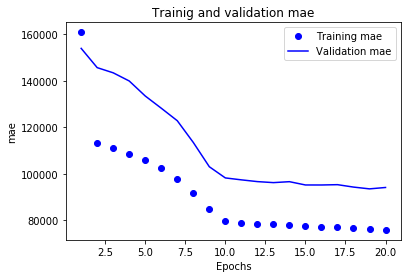

In [0]:
import matplotlib.pyplot as plt
maeO = history.history['mean_absolute_error']
val_maeO = history.history['val_mean_absolute_error']
epochs = range (1, len(maeO)+1)
plt.plot(epochs, maeO, 'bo', label='Training mae')
plt.plot(epochs, val_maeO, 'b', label='Validation mae')
plt.title('Trainig and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()

plt.show()

# **Normalizing input**

In [0]:
# Normalize columns
normalized = preprocessing.normalize(df)
normalized = pd.DataFrame(normalized, columns=names)

In [0]:
dfnor = normalized

In [0]:
from sklearn.preprocessing import MinMaxScaler

# create scaler
scaler = MinMaxScaler()
# fit scaler on data
scaler.fit(df)
# apply transform
normalized2 = scaler.transform(df)
normalized2 = pd.DataFrame(normalized2, columns=names)
dfnor2=normalized2
# inverse transform
inverse = scaler.inverse_transform(normalized2)

In [0]:
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

# **Shuffling the training samples**

In [0]:
def Randomizing(df):
    df2 = df.reindex(np.random.permutation(df.index))
    return df2

In [0]:
dfnor2=Randomizing(dfnor2)
Randomizing(dfnor2).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9926,0.459163,0.450584,0.509804,0.106682,0.146803,0.063090,0.144877,0.120467,0.114847
13775,0.233068,0.572795,0.470588,0.069856,0.051831,0.029681,0.054761,0.488952,0.649896
1548,0.710159,0.212540,0.137255,0.330144,0.387027,0.171810,0.382010,0.166018,0.214847
11388,0.311753,0.625930,0.372549,0.054093,0.052452,0.026094,0.055090,0.278403,0.421237
11897,0.297809,0.645058,0.666667,0.062027,0.056487,0.027747,0.058050,0.313741,0.266187


# Batch Normalization, Dropout, lr decay, **momentum**

In [0]:
# import BatchNormalization
from keras.layers.normalization import BatchNormalization
from keras import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.optimizers import SGD, rmsprop

# instantiate model
model = Sequential()

# we can think of this chunk as the input layer
model.add(Dense(16, input_dim=8, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# we can think of this chunk as the hidden layer    
model.add(Dense(32, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# we can think of this chunk as the output layer
model.add(Dense(1, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# setting up the optimization of our weights 
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.7, nesterov=True)
model.compile(loss='mse', optimizer= sgd, metrics=['mae'])

# running the fitting
history = model.fit(dfnor2[dfnor2.columns[:-1]], dfnor2[dfnor2.columns[-1:]], nb_epoch=10, batch_size=512, validation_split=0.2)
#history = model.fit(df[df.columns[:-1]], df[df.columns[-1:]], epochs=20, batch_size=32, validation_split=0.2)
model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 13600 samples, validate on 3400 samples
Epoch 1/10
13600/13600 [==============================] - 1s 60us/step - loss: 0.0928 - mean_absolute_error: 0.2416 - val_loss: 0.0706 - val_mean_absolute_error: 0.2106
Epoch 2/10
13600/13600 [==============================] - 0s 7us/step - loss: 0.0665 - mean_absolute_error: 0.2042 - val_loss: 0.0541 - val_mean_absolute_error: 0.1890
Epoch 3/10
13600/13600 [==============================] - 0s 7us/step - loss: 0.0586 - mean_absolute_error: 0.1904 - val_loss: 0.0471 - val_mean_absolute_error: 0.1653
Epoch 4/10
13600/13600 [==============================] - 0s 8us/step - loss: 0.0512 - mean_absolute_error: 0.1777 - val_loss: 0.0455 - val_mean_absolute_error: 0.1590
Epoch 5/10
13600/13600 [==============================] - 0s 7us/step - loss: 0.0455 - mean_absolute_error: 0.1681 - val_loss: 0.0373 - val_mean_absolute_error: 0.1432
Epoch 6/10
13600/13600 [==============================] - 0s 7us/step - loss: 0.0405 - mean_absolute_error: 0.

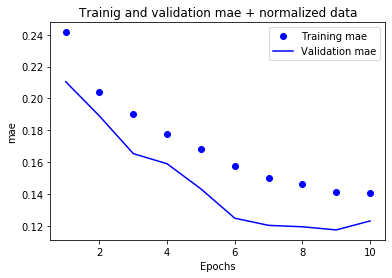

In [0]:
import matplotlib.pyplot as plt

mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
epochs = range (1, len(mae)+1)

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Trainig and validation mae + normalized data')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()

plt.show()

# **MODELO 2**

In [0]:
from keras.optimizers import SGD, rmsprop, Adam, Nadam
# instantiate model
model = Sequential()

# we can think of this chunk as the input layer
model.add(Dense(32, input_dim=8, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# we can think of this chunk as the hidden layer    
model.add(Dense(64, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# we can think of this chunk as the output layer
model.add(Dense(1, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# setting up the optimization of our weights 
optimizer = Nadam(lr = 0.05)
model.compile(loss='mse', optimizer= optimizer, metrics=['mae'])

# running the fitting
history = model.fit(dfnor2[dfnor2.columns[:-1]], dfnor2[dfnor2.columns[-1:]], nb_epoch=10, batch_size=512, validation_split=0.2)
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 13600 samples, validate on 3400 samples
Epoch 1/10
13600/13600 [==============================] - 1s 88us/step - loss: 0.0951 - mean_absolute_error: 0.2361 - val_loss: 0.0613 - val_mean_absolute_error: 0.1892
Epoch 2/10
13600/13600 [==============================] - 0s 12us/step - loss: 0.0602 - mean_absolute_error: 0.1929 - val_loss: 0.0519 - val_mean_absolute_error: 0.1841
Epoch 3/10
13600/13600 [==============================] - 0s 12us/step - loss: 0.0482 - mean_absolute_error: 0.1723 - val_loss: 0.0447 - val_mean_absolute_error: 0.1758
Epoch 4/10
13600/13600 [==============================] - 0s 12us/step - loss: 0.0407 - mean_absolute_error: 0.1571 - val_loss: 0.0436 - val_mean_absolute_error: 0.1776
Epoch 5/10
13600/13600 [==============================] - 0s 12us/step - loss: 0.0372 - mean_absolute_error: 0.1494 - val_loss: 0.0409 - val_mean_absolute_error: 0.1591
Epoch 6/10
13600/13600 [==============================] - 0s 14us/step - loss: 0.0349 - mean_absolute_erro

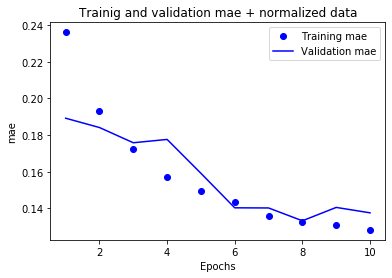

In [0]:
import matplotlib.pyplot as plt

mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
epochs = range (1, len(mae)+1)

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Trainig and validation mae + normalized data')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()

plt.show()

# **MODELO 3**


In [0]:
from keras.optimizers import SGD, rmsprop, Adam, Nadam
# instantiate model
model = Sequential()

# we can think of this chunk as the input layer
model.add(Dense(32, input_dim=8, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))

# we can think of this chunk as the hidden layer    
model.add(Dense(64, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))

# we can think of this chunk as the output layer
model.add(Dense(1, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('tanh'))

# setting up the optimization of our weights 
optimizer = SGD(lr=0.01, decay=1e-6,momentum=0.7, nesterov=True)
model.compile(loss='mse', optimizer= optimizer, metrics=['mae'])

# running the fitting
history = model.fit(dfnor2[dfnor2.columns[:-1]], dfnor2[dfnor2.columns[-1:]], nb_epoch=10, batch_size=512, validation_split=0.2)
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 13600 samples, validate on 3400 samples
Epoch 1/10
13600/13600 [==============================] - 1s 88us/step - loss: 0.3153 - mean_absolute_error: 0.4441 - val_loss: 0.4518 - val_mean_absolute_error: 0.5791
Epoch 2/10
13600/13600 [==============================] - 0s 10us/step - loss: 0.1013 - mean_absolute_error: 0.2465 - val_loss: 0.0676 - val_mean_absolute_error: 0.2105
Epoch 3/10
13600/13600 [==============================] - 0s 10us/step - loss: 0.0419 - mean_absolute_error: 0.1644 - val_loss: 0.0342 - val_mean_absolute_error: 0.1475
Epoch 4/10
13600/13600 [==============================] - 0s 11us/step - loss: 0.0303 - mean_absolute_error: 0.1384 - val_loss: 0.0284 - val_mean_absolute_error: 0.1288
Epoch 5/10
13600/13600 [==============================] - 0s 11us/step - loss: 0.0282 - mean_absolute_error: 0.1312 - val_loss: 0.0270 - val_mean_absolute_error: 0.1221
Epoch 6/10
13600/13600 [==============================] - 0s 10us/step - loss: 0.0274 - mean_absolute_erro

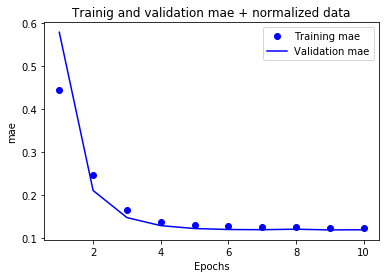

In [0]:
import matplotlib.pyplot as plt

mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
epochs = range (1, len(mae)+1)

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Trainig and validation mae + normalized data')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()

plt.show()

# **MODELO 4**

In [0]:
from keras.optimizers import SGD, rmsprop, Adam, Nadam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
# instantiate model
model = Sequential()

# we can think of this chunk as the input layer
model.add(Dense(32, input_dim=8, kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))

# we can think of this chunk as the hidden layer    
model.add(Dense(64, kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))

# we can think of this chunk as the output layer
model.add(Dense(1, kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Activation('tanh'))

# setting up the optimization of our weights 
optimizer = SGD(lr=0.05, decay=1e-6,momentum=0.7, nesterov=False)
model.compile(loss='mse', optimizer= optimizer, metrics=['mae'])

# running the fitting
history = model.fit(dfnor2[dfnor2.columns[:-1]], dfnor2[dfnor2.columns[-1:]], nb_epoch=10, batch_size=512, validation_split=0.2)
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 13600 samples, validate on 3400 samples
Epoch 1/10
13600/13600 [==============================] - 2s 128us/step - loss: 0.1940 - mean_absolute_error: 0.3212 - val_loss: 0.0375 - val_mean_absolute_error: 0.1502
Epoch 2/10
13600/13600 [==============================] - 0s 12us/step - loss: 0.0449 - mean_absolute_error: 0.1645 - val_loss: 0.0324 - val_mean_absolute_error: 0.1392
Epoch 3/10
13600/13600 [==============================] - 0s 11us/step - loss: 0.0422 - mean_absolute_error: 0.1593 - val_loss: 0.0302 - val_mean_absolute_error: 0.1329
Epoch 4/10
13600/13600 [==============================] - 0s 11us/step - loss: 0.0397 - mean_absolute_error: 0.1541 - val_loss: 0.0284 - val_mean_absolute_error: 0.1270
Epoch 5/10
13600/13600 [==============================] - 0s 10us/step - loss: 0.0381 - mean_absolute_error: 0.1514 - val_loss: 0.0274 - val_mean_absolute_error: 0.1214
Epoch 6/10
13600/13600 [==============================] - 0s 10us/step - loss: 0.0372 - mean_absolute_err

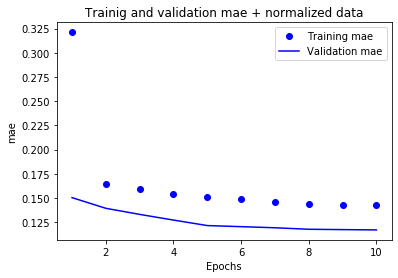

In [0]:
import matplotlib.pyplot as plt

mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
epochs = range (1, len(mae)+1)

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Trainig and validation mae + normalized data')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()

plt.show()

# **MODELO 5**

In [0]:
from keras.optimizers import SGD, rmsprop, Adam, Nadam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
# instantiate model
model = Sequential()

# we can think of this chunk as the input layer
model.add(Dense(32, input_dim=8, kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))

# we can think of this chunk as the hidden layer    
model.add(Dense(64, kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))

# we can think of this chunk as the output layer
model.add(Dense(1, kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Activation('tanh'))

# setting up the optimization of our weights 
optimizer = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='mse', optimizer= optimizer, metrics=['mae'])

# running the fitting
history = model.fit(dfnor2[dfnor2.columns[:-1]], dfnor2[dfnor2.columns[-1:]], nb_epoch=10, batch_size=512, validation_split=0.2)
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 13600 samples, validate on 3400 samples
Epoch 1/10
13600/13600 [==============================] - 2s 164us/step - loss: 0.3444 - mean_absolute_error: 0.4674 - val_loss: 0.6837 - val_mean_absolute_error: 0.7700
Epoch 2/10
13600/13600 [==============================] - 0s 11us/step - loss: 0.1287 - mean_absolute_error: 0.2781 - val_loss: 0.0715 - val_mean_absolute_error: 0.2132
Epoch 3/10
13600/13600 [==============================] - 0s 13us/step - loss: 0.0414 - mean_absolute_error: 0.1638 - val_loss: 0.0297 - val_mean_absolute_error: 0.1344
Epoch 4/10
13600/13600 [==============================] - 0s 11us/step - loss: 0.0285 - mean_absolute_error: 0.1352 - val_loss: 0.0312 - val_mean_absolute_error: 0.1337
Epoch 5/10
13600/13600 [==============================] - 0s 12us/step - loss: 0.0250 - mean_absolute_error: 0.1217 - val_loss: 0.0383 - val_mean_absolute_error: 0.1510
Epoch 6/10
13600/13600 [==============================] - 0s 12us/step - loss: 0.0238 - mean_absolute_err

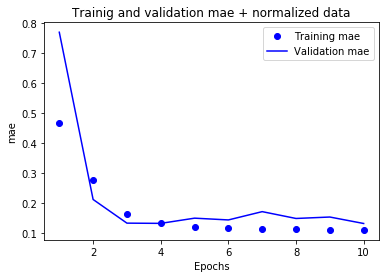

In [0]:


mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
epochs = range (1, len(mae)+1)

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Trainig and validation mae + normalized data')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()

plt.show()

**Conclusión**

Se hizo un ajuste en el tamaño del Batch a 512 para todos los modelos y también en el número de capas. Haciendo esto, se obtienen los modelos presentados anteriormente, que son lo de mejor ajuste. Adicionalmente, se hicieron ajustes en el optimizador, el Activador, inicializador y la tasa de aprendizaje. 

SE escoge el últmo de los modelos presentados, el modelo 5, dado su nivel de aprendizaje y que no presenta underfit ni overfit
